# Circular Predictors

Circular predictors (aka *cyclic variables*, *circular variables*) are independent variables for which the beginning of their scale happens to be their end. They are relatively common. Some examples:
- angles ($[0^o..360^o]$, $[0..2\pi]$)
- time units (days of the month, months of the year, minutes, seconds, ...)


Usually, it is not appropriate to use circular variables in their original form as predictors in a ML pipeline. And that is because many ML algorithm compute *distances* as a similarity measure.

Transforming cyclic variables is essential in some machine learning tasks, especially when dealing with time-related or angular data like time of day, months of the year, or compass directions. To represent cyclic variables in a meaningful way, you can use several techniques. One of them is called  **circular encoding**. In this notebook, you find an example of this technique in Python.

# Circular Encoding

Circular encoding transforms cyclic variables into two new features by using trigonometric functions like sine and cosine. These two features represent the cyclic variable's position on a unit circle.

Here's an example using the hour of the day as a cyclic variable:

In [2]:
import pandas as pd
import numpy as np

# Sample data
data = pd.DataFrame({'hour_of_day': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]})

# Circular encoding
data['hour_sin'] = np.sin(2 * np.pi * data['hour_of_day'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour_of_day'] / 24)

print(data)

    hour_of_day      hour_sin      hour_cos
0             0  0.000000e+00  1.000000e+00
1             1  2.588190e-01  9.659258e-01
2             2  5.000000e-01  8.660254e-01
3             3  7.071068e-01  7.071068e-01
4             4  8.660254e-01  5.000000e-01
5             5  9.659258e-01  2.588190e-01
6             6  1.000000e+00  6.123234e-17
7             7  9.659258e-01 -2.588190e-01
8             8  8.660254e-01 -5.000000e-01
9             9  7.071068e-01 -7.071068e-01
10           10  5.000000e-01 -8.660254e-01
11           11  2.588190e-01 -9.659258e-01
12           12  1.224647e-16 -1.000000e+00
13           13 -2.588190e-01 -9.659258e-01
14           14 -5.000000e-01 -8.660254e-01
15           15 -7.071068e-01 -7.071068e-01
16           16 -8.660254e-01 -5.000000e-01
17           17 -9.659258e-01 -2.588190e-01
18           18 -1.000000e+00 -1.836970e-16
19           19 -9.659258e-01  2.588190e-01
20           20 -8.660254e-01  5.000000e-01
21           21 -7.071068e-01  7

<Axes: >

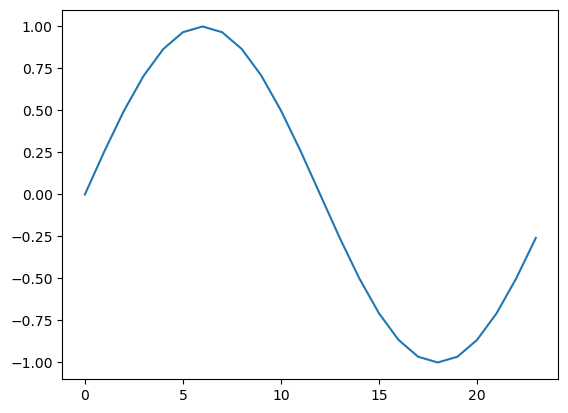

In [3]:
data.hour_sin.plot()

<Axes: >

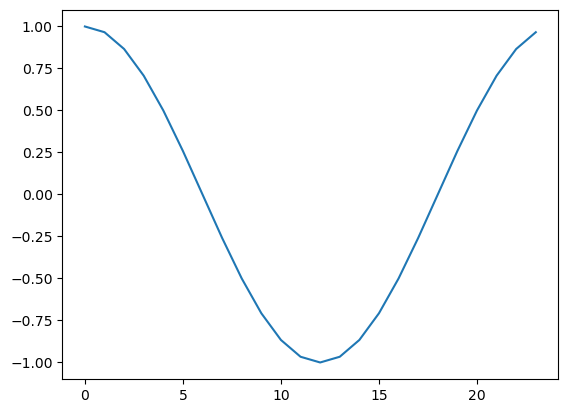

In [4]:
data.hour_cos.plot()

In this example, 'hour_trig' is a complex number that represents the hour of the day, combining amplitude and phase information.

You can apply these encoding techniques to other cyclic variables like days of the week, months of the year, or compass directions. Just make sure to adjust the scaling factor (e.g., 24 for hours of the day, 7 for days of the week, etc.) accordingly.

# Remarks

- When using these transformed features in your machine learning pipeline, remember to scale or standardize them along with your other features to ensure they have similar magnitudes.

- A good introduction on dealing with circular predictor may be found in *Pewsey, Neuhauser & Ruxton (2013), Circular Statistics in R*.

- A useful Python library to encode time-related data is called [Holydays](https://pypi.org/project/holidays/). Check it out!